In [13]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
#Loading dataset
file_path = "D:\marketing_campaign.csv"

df = pd.read_csv(file_path)  

In [15]:
# Display basic information
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain 

In [16]:
# Drop irrelevant columns
df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], errors='ignore', 
        inplace=True)

In [17]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])

In [18]:
# Encoding categorical features
categorical_cols = ['Education', 'Marital_Status']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [19]:
# Selecting numeric features for clustering
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

In [20]:
# Display summary statistics
print("\nSummary Statistics:")
print(df_numeric.describe())


Summary Statistics:
        Year_Birth    Education  Marital_Status         Income      Kidhome  \
count  2240.000000  2240.000000     2240.000000    2240.000000  2240.000000   
mean   1968.805804     2.393750        3.729911   52237.975446     0.444196   
std      11.984069     1.124797        1.076277   25037.955891     0.538398   
min    1893.000000     0.000000        0.000000    1730.000000     0.000000   
25%    1959.000000     2.000000        3.000000   35538.750000     0.000000   
50%    1970.000000     2.000000        4.000000   51381.500000     0.000000   
75%    1977.000000     3.000000        5.000000   68289.750000     1.000000   
max    1996.000000     4.000000        7.000000  666666.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000   
mean      0.506250    49.109375   303.935714    26.302232       166.950000   
std       0.544538    28.962453  

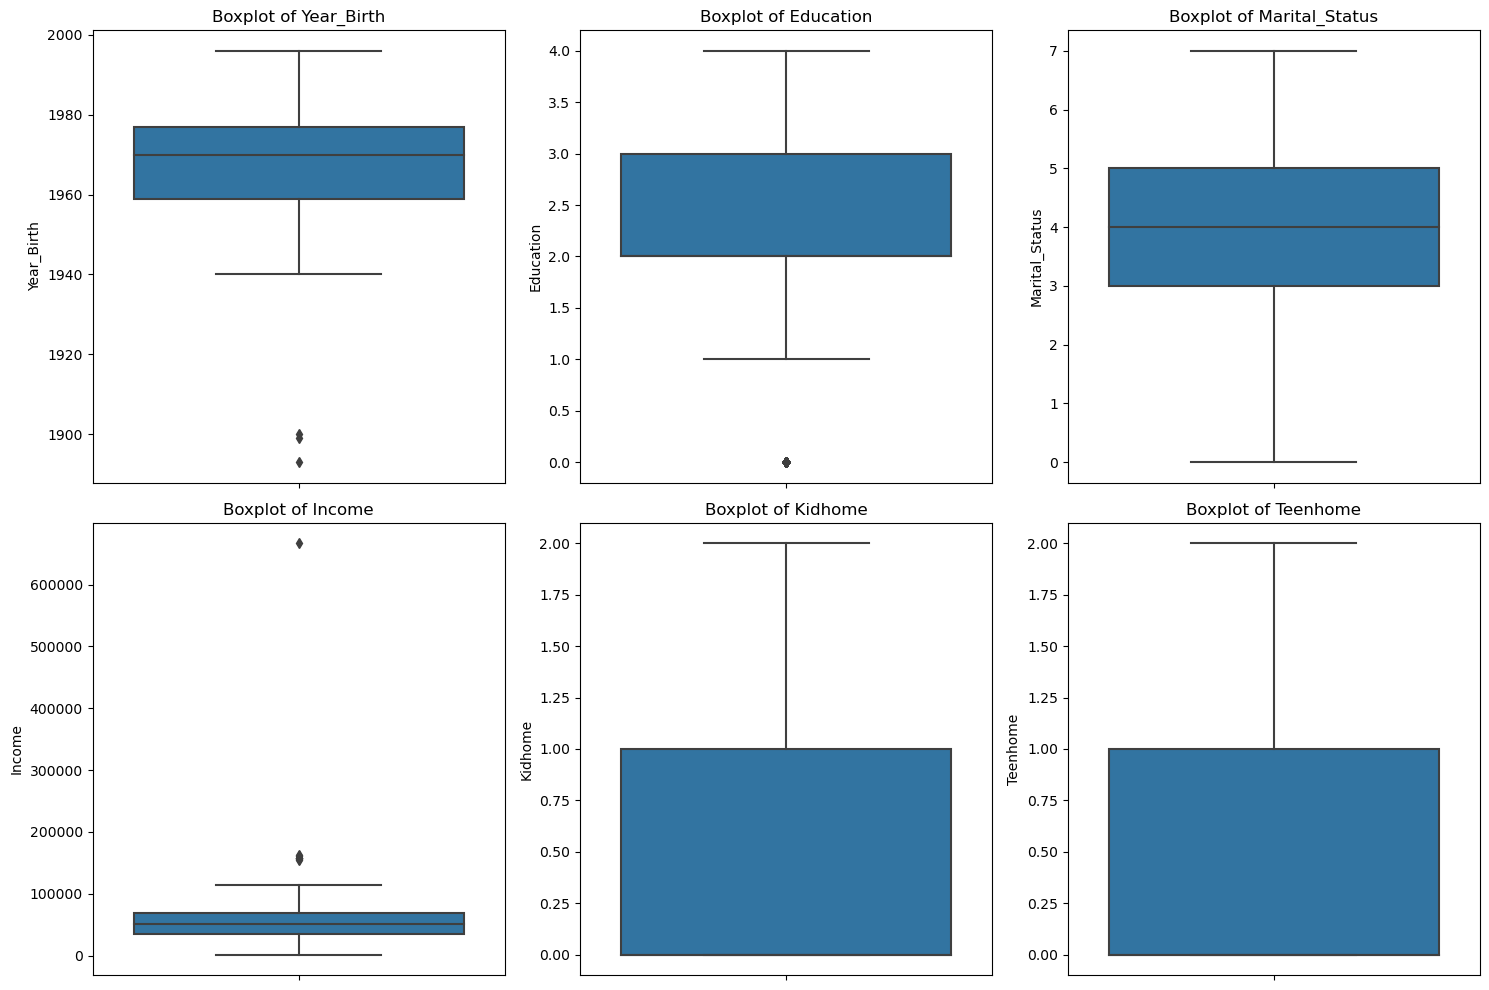

In [21]:
# Outlier detection using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:6]): 
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [22]:
# Standardizing data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

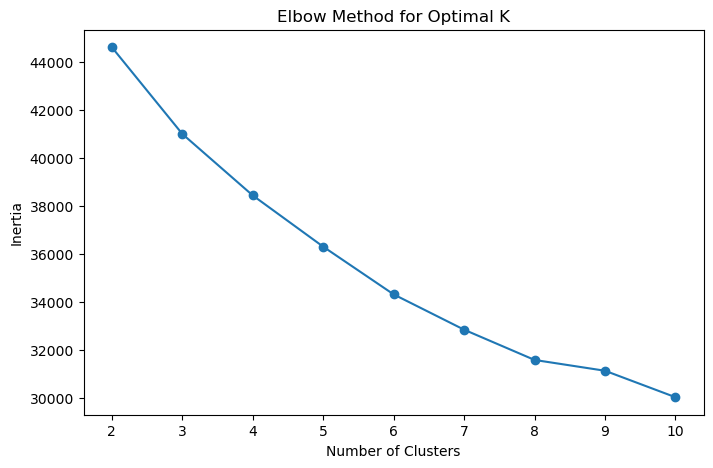

In [23]:
# Finding optimal number of clusters using Elbow Method
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

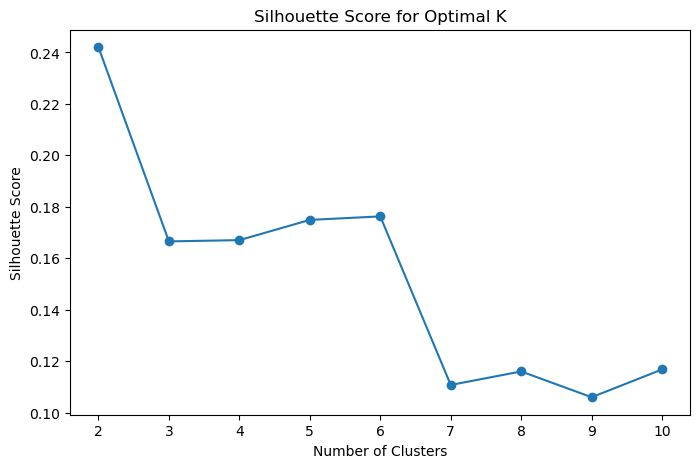

In [24]:
# Finding optimal clusters using Silhouette Score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

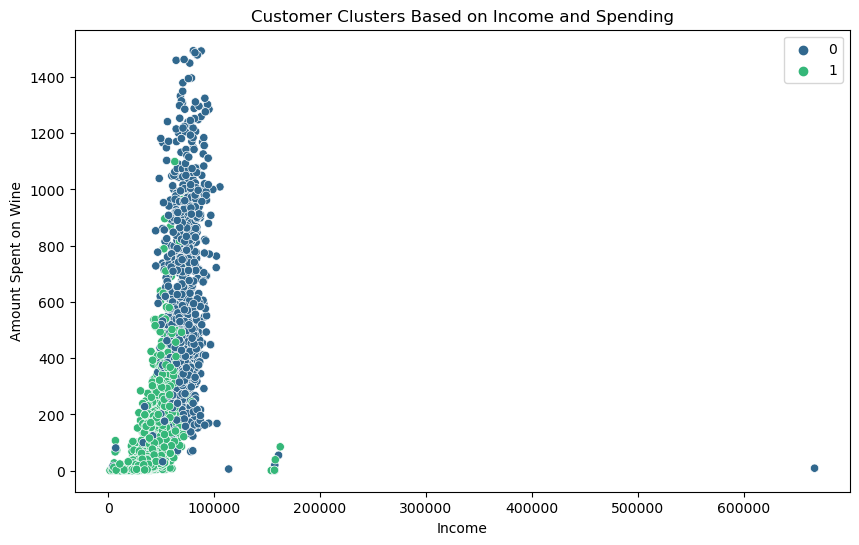

In [25]:
# Choosing the best K and fitting final model
optimal_k = k_values[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing clusters (Example: Income vs. Spending)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income'], y=df['MntWines'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wine')
plt.title('Customer Clusters Based on Income and Spending')
plt.legend()
plt.show()

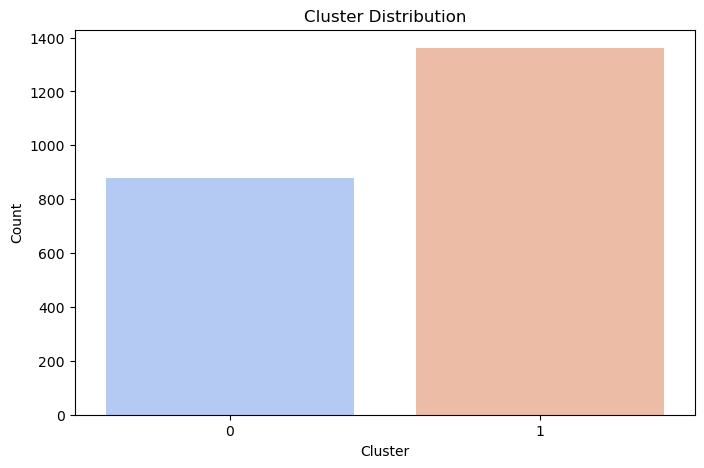

In [26]:
# Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cluster'], palette='coolwarm')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

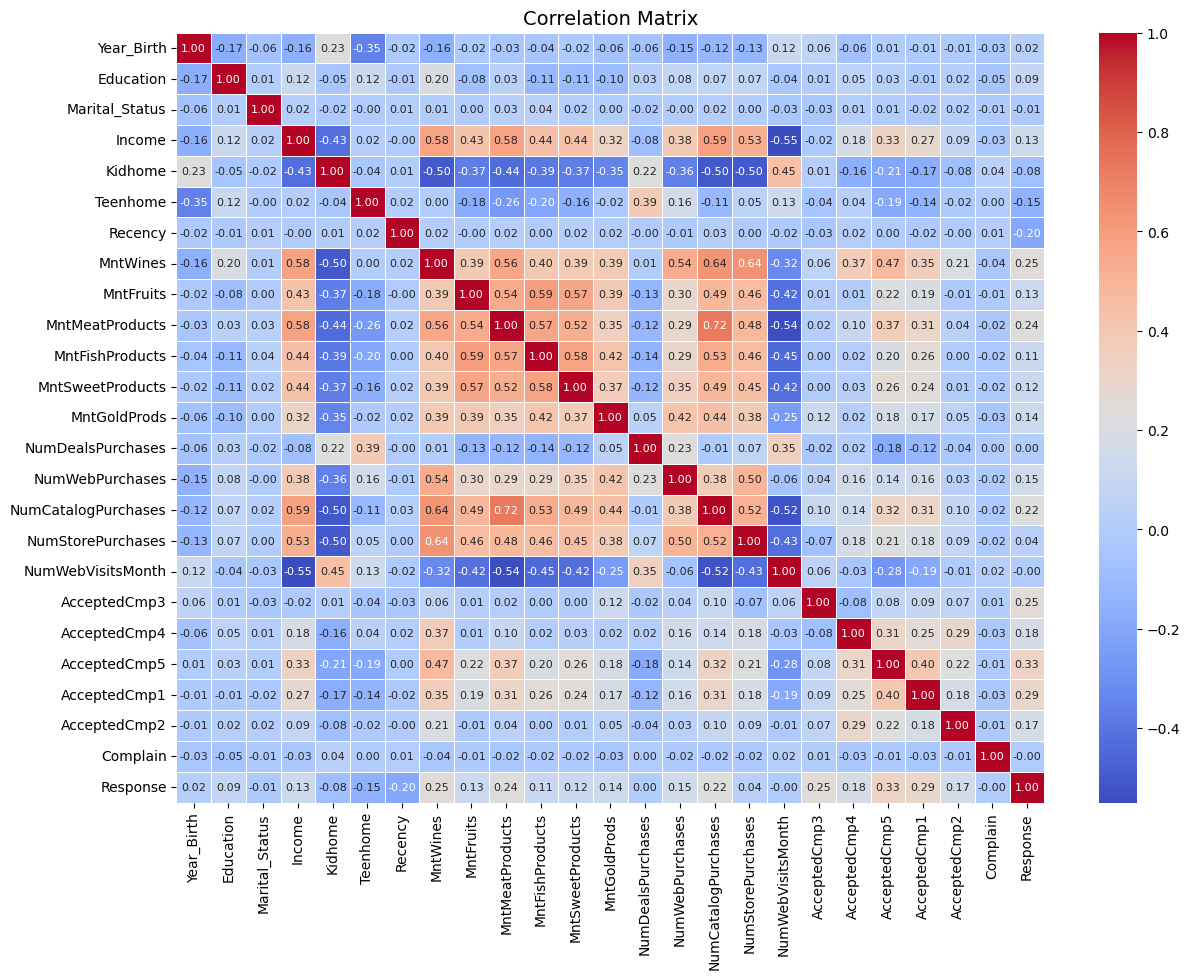

In [28]:
# Correlation matrix
plt.figure(figsize=(14, 10)) 
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix', fontsize=14)
plt.show()


In [29]:
# Summary of each cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
          Year_Birth  Education  Marital_Status        Income   Kidhome  \
Cluster                                                                   
0        1967.064846   2.448237        3.742890  72258.150171  0.065984   
1        1969.930198   2.358560        3.721528  39307.972814  0.688464   

         Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  ...  \
Cluster                                                               ...   
0        0.423208  49.489192  607.714448  56.489192       366.364050  ...   
1        0.559882  48.864071  107.740632   6.806025        38.158707  ...   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Cluster                                                              
0                   5.377702           8.560865           3.651877   
1                   0.908156           4.000735           6.391624   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Cluster   